In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [146]:
from collections import defaultdict
d_lab = defaultdict(LabelEncoder) # for label-encoding
d_scale = defaultdict(StandardScaler) # for scaling

In [47]:
data = pd.read_csv("data/Placement Survey (Responses) - Form Responses 1.csv")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
Timestamp                          147 non-null object
Name                               147 non-null object
Age                                146 non-null float64
Gender                             147 non-null object
Hobby                              147 non-null object
10th percentage                    147 non-null float64
12th Board                         147 non-null object
12th/Diploma percentage            147 non-null float64
Branch of engineering              147 non-null object
BTech CGPA                         147 non-null object
Future interests                   147 non-null object
Dropper?                           147 non-null object
Preparation level for Interview    147 non-null object
Internships done?                  147 non-null object
Placed?                            147 non-null object
If placed, Name of Company         42 non-null object
If placed, Co

In [49]:
data.head()

,Timestamp,Name,Age,Gender,Hobby,10th percentage,12th Board,12th/Diploma percentage,Branch of engineering,BTech CGPA,Future interests,Dropper?,Preparation level for Interview,Internships done?,Placed?,"If placed, Name of Company","If placed, Company Designation"
0,2/2/2019 20:34:03,Shashwat Swain,21.0,Male,Coding,91.00,CBSE,93.00,CSE,8.5,MTech,No,High,Yes,Yes,Invicix Labs,NaN
1,2/2/2019 20:45:30,Santoshini Behera,22.0,Female,Music,84.50,CBSE,85.40,CSE,8.61,MTech,No,Moderate,No,Yes,Wipro,Bangalore
2,2/2/2019 20:46:49,Ananya Patra,21.0,Female,,86.67,CHSE,76.67,Mechanical,8.41,Others,No,Moderate,Yes,Yes,Tata steel BSL,NaN
3,2/2/2019 20:50:04,PRASANTA KUMAR PADHI,21.0,Male,Others,85.66,CHSE,74.00,Mechanical,8.67,MTech,Yes,Moderate,Yes,No,NaN,NaN
4,2/2/2019 20:51:44,MUKTI GOURAV NAYAK,22.0,Male,Others,95.00,CBSE,89.40,Mechanical,8.16,MBA,Yes,Moderate,Yes,Yes,"TATA STEEL, BSL.",Graduate Management Trainee


In [50]:
data.columns

Index(['Timestamp', 'Name', 'Age', 'Gender', 'Hobby', '10th percentage',
       '12th Board', '12th/Diploma percentage', 'Branch of engineering',
       'BTech CGPA', 'Future interests', 'Dropper? ',
       'Preparation level for Interview', 'Internships done? ', 'Placed? ',
       'If placed, Name of Company', 'If placed, Company Designation '],
      dtype='object')

In [51]:
# Dropping the unnecessary columns
data.drop(['Timestamp', 'Name', 'If placed, Name of Company', 'If placed, Company Designation '], axis=1, inplace=True)

In [52]:
data.shape # New data shape

(147, 13)

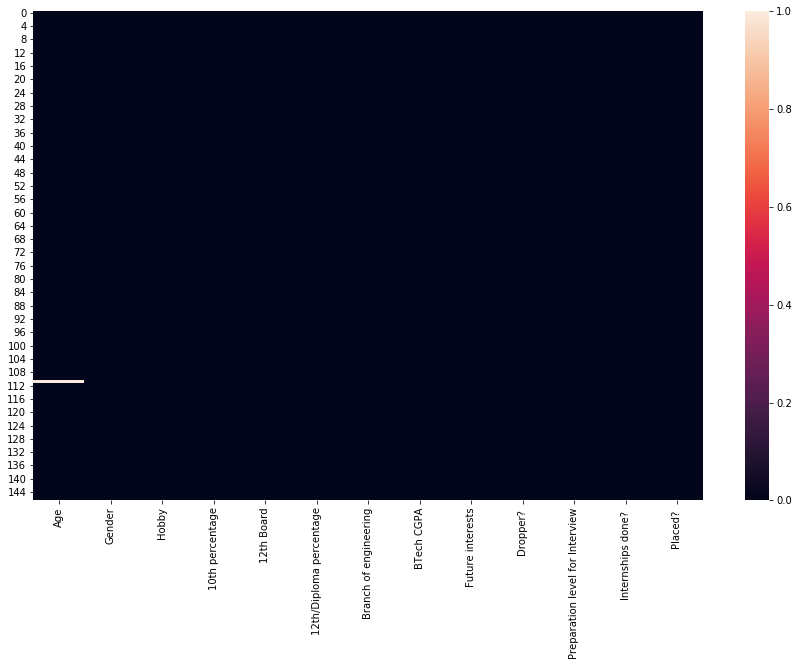

In [53]:
# checking for Null values
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.isnull(), ax=ax)

In [54]:
# imputing the missing 'Age' value using mean
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

In [55]:
data.head()

,Age,Gender,Hobby,10th percentage,12th Board,12th/Diploma percentage,Branch of engineering,BTech CGPA,Future interests,Dropper?,Preparation level for Interview,Internships done?,Placed?
0,21.0,Male,Coding,91.00,CBSE,93.00,CSE,8.5,MTech,No,High,Yes,Yes
1,22.0,Female,Music,84.50,CBSE,85.40,CSE,8.61,MTech,No,Moderate,No,Yes
2,21.0,Female,,86.67,CHSE,76.67,Mechanical,8.41,Others,No,Moderate,Yes,Yes
3,21.0,Male,Others,85.66,CHSE,74.00,Mechanical,8.67,MTech,Yes,Moderate,Yes,No
4,22.0,Male,Others,95.00,CBSE,89.40,Mechanical,8.16,MBA,Yes,Moderate,Yes,Yes


In [133]:
# columns to label encode
to_lab_enc_cols = ["Gender", "Dropper? ", "Preparation level for Interview", 'Internships done? ', "Placed? "]
to_cat_enc_cols = ["12th Board", "Hobby", "Branch of engineering", "Future interests"]

In [134]:
# Label Encoding the categorical columns
data_lab_encoded = data[to_lab_enc_cols].apply(lambda x: d_lab[x.name].fit_transform(x))

In [135]:
# One-Hote Encoding of categorical columns
data_cat_encoded = pd.DataFrame()
for i in range(len(to_cat_enc_cols)):
    data_cat_encoded=pd.concat([data_cat_encoded, pd.get_dummies(data[to_cat_enc_cols[i]])], axis=1)

In [136]:
data_cat_encoded.columns

Index(['CBSE', 'CHSE', 'ICSE', ' ', 'Art', 'Coding', 'Dance', 'Music',
       'Others', 'Sports', 'CSE', 'Chemical', 'Civil', 'ETC', 'Electrical',
       'Mechanical', 'Mettalurgy', 'Production', 'Banking', 'MBA', 'MS',
       'MTech', 'Others'],
      dtype='object')

In [137]:
data_cat_encoded.columns = ['board.CBSE', 'board.CHSE', 'board.ICSE', 'hobby.nothing_particular',
                            'hobby.Art', 'hobby.Coding', 'hobby.Dance', 'hobby.Music', 'hobby.Others',
                            'hobby.Sports', 'branch.CSE', 'branch.Chemical', 'branch.Civil', 'branch.ETC',
                            'branch.Electrical', 'branch.Mechanical', 'branch.Mettalurgy', 'branch.Production',
                            'interest.Banking', 'interest.MBA', 'interest.MS', 'interest.MTech', 'interest.Others']

In [138]:
data_cat_encoded.head()

,board.CBSE,board.CHSE,board.ICSE,hobby.nothing_particular,hobby.Art,hobby.Coding,hobby.Dance,hobby.Music,hobby.Others,hobby.Sports,...,branch.ETC,branch.Electrical,branch.Mechanical,branch.Mettalurgy,branch.Production,interest.Banking,interest.MBA,interest.MS,interest.MTech,interest.Others
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [139]:
# checking the shape of the encoded columns
print(data_lab_encoded.shape)
print(data_cat_encoded.shape)

(147, 5)
(147, 23)


In [140]:
to_cat_enc_cols

['12th Board', 'Hobby', 'Branch of engineering', 'Future interests']

In [141]:
data_new = pd.concat([data.drop(to_lab_enc_cols+to_cat_enc_cols, axis=1), data_lab_encoded, data_cat_encoded], axis=1)

In [142]:
data_new.columns

Index(['Age', '10th percentage', '12th/Diploma percentage', 'BTech CGPA',
       'Gender', 'Dropper? ', 'Preparation level for Interview',
       'Internships done? ', 'Placed? ', 'board.CBSE', 'board.CHSE',
       'board.ICSE', 'hobby.nothing_particular', 'hobby.Art', 'hobby.Coding',
       'hobby.Dance', 'hobby.Music', 'hobby.Others', 'hobby.Sports',
       'branch.CSE', 'branch.Chemical', 'branch.Civil', 'branch.ETC',
       'branch.Electrical', 'branch.Mechanical', 'branch.Mettalurgy',
       'branch.Production', 'interest.Banking', 'interest.MBA', 'interest.MS',
       'interest.MTech', 'interest.Others'],
      dtype='object')

In [143]:
data_new.head()

,Age,10th percentage,12th/Diploma percentage,BTech CGPA,Gender,Dropper?,Preparation level for Interview,Internships done?,Placed?,board.CBSE,...,branch.ETC,branch.Electrical,branch.Mechanical,branch.Mettalurgy,branch.Production,interest.Banking,interest.MBA,interest.MS,interest.MTech,interest.Others
0,21.0,91.00,93.00,8.5,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,22.0,84.50,85.40,8.61,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,21.0,86.67,76.67,8.41,0,0,2,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,21.0,85.66,74.00,8.67,1,1,2,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,22.0,95.00,89.40,8.16,1,1,2,1,1,1,...,0,0,1,0,0,0,1,0,0,0


In [204]:
def to_num_cgpa(x):
    '''
    function to parse 'BTech CGPA' into numerical values
    '''
    try:
        return float(x)
    except:
        return x.split('(')[0]

In [235]:
data_new['BTech CGPA'] = pd.to_numeric(data_new['BTech CGPA'].apply(to_num_cgpa))

In [238]:
data_new[['BTech CGPA']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 1 columns):
BTech CGPA    147 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [233]:
# checking if all values are float
def check_type_for_object_data(df=data, col='BTech CGPA'):
    for _ in df[col]:
        if type(_) is not float:
            print(_)
            print(type(_))
            #return 'Non-float value found!'
            print('Non-float value found!')
    return 'Success!'

In [234]:
check_type_for_object_data()

8.5
<class 'str'>
Non-float value found!
8.61
<class 'str'>
Non-float value found!
8.41
<class 'str'>
Non-float value found!
8.67
<class 'str'>
Non-float value found!
8.16
<class 'str'>
Non-float value found!
8.16
<class 'str'>
Non-float value found!
7.9
<class 'str'>
Non-float value found!
7.8
<class 'str'>
Non-float value found!
7.85
<class 'str'>
Non-float value found!
8.62
<class 'str'>
Non-float value found!
8
<class 'str'>
Non-float value found!
7.8
<class 'str'>
Non-float value found!
8.3
<class 'str'>
Non-float value found!
6.7
<class 'str'>
Non-float value found!
7.57
<class 'str'>
Non-float value found!
7.79
<class 'str'>
Non-float value found!
8.03
<class 'str'>
Non-float value found!
7.83
<class 'str'>
Non-float value found!
8.12
<class 'str'>
Non-float value found!
8
<class 'str'>
Non-float value found!
8.35
<class 'str'>
Non-float value found!
8.23
<class 'str'>
Non-float value found!
8.14
<class 'str'>
Non-float value found!
7.82
<class 'str'>
Non-float value found!
8.23

'Success!'

In [216]:
type(data_new['10th percentage'][0])

numpy.float64

In [159]:
cols_to_be_scaled = ['10th percentage', '12th/Diploma percentage', 'BTech CGPA']

In [239]:
# scaling the data using StandarScaler
scaler = StandardScaler()
#data_new_scaled = data_new[cols_to_be_scaled].apply(lambda x: d_scale[x.name].fit_transform(x))

In [152]:
print(data_new_scaled[0])

<bound method TransformerMixin.fit_transform of StandardScaler(copy=True, with_mean=True, with_std=True)>


In [60]:
# Inverse the encoded
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
#df.apply(lambda x: d[x.name].transform(x))

Gender                                                      Gender
Hobby                                                        Hobby
Dropper?                                                 Dropper? 
Preparation level for Interview    Preparation level for Interview
Internships done?                               Internships done? 
Placed?                                                   Placed? 
dtype: object